# Introduction to Data Science 
# Lecture 17: Clustering 1
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we will introduce clustering, an **unsupervised** learning technique. We'll cover the following topics:
* supervised vs. unsupervised learning
* clustering 
* the k-means clustering algorithm

Recommended Reading: 
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 10.1 and 10.3. [digitial version available here](http://www-bcf.usc.edu/~gareth/ISL/)
* J. Grus, Data Science from Scratch, Ch. 19
* [scikit-learn documentation on clustering](http://scikit-learn.org/stable/modules/clustering.html)

### Types of Clustering Methods

1. Partitional Algorithms
 - divide data into set of bins
 - bins either manually set (e.g., k-means) or automatically determined (e.g., affinity propagation)

2. Hierarchical Algorithms
 - Produce a *dendrogram* or "similarity tree", 
 - clusters can be produced by "cutting" the dendrogram

3. Bi-Clustering
 - Clusters dimensions & records

4. Fuzzy clustering
 - probabilistic cluster assignment allows occurrence of elements in multiples clusters
 
Many variants of these ideas are implemented in scikit-learn. [Here](http://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) is an overview. 


There are several **methods** for clustering. We'll discuss: 
* k-means clustering (today)
* hierarchical clustering 
* DBSCAN

## K-Means with SciKit Learn

SciKit learn has a nice [implementaton of the k-means method](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), which we'll use to cluster various artificial datasets first.

In [1]:
import numpy as np

from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

**How do you choose K?** Ideas:

1. Visual comparison.
2. Looking for at which $k$ the total intra-cluster distance tapers off. 
3. [Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

The first method is useful when the feature vectors are lower dimensional, but it's difficult to visualize data in higher dimensions. Let's consider the other two ideas.

### Analyzing Change in Intra-Cluster Distance

We can run K-Means for different Ks and plot the intra-cluster distance. 

In [105]:
import pandas as pd

In [439]:
df = pd.read_csv('../../../comp5360_final/data/final_combined.csv', skiprows=1)
df

name                objID                ra                 dec   run  \
0          1  1237660961327743273    135.6891066036    32.4946318397087  3606   
1          2  1237664879951151463  144.826100550256    31.2741848944939  4518   
2          3  1237660961330430096  142.188789562506    35.5824441819976  3606   
3          4  1237663478724298013  338.741037753146  -0.402827574587482  4192   
4          5  1237680272041377978  345.282593210935    21.1838656010284  8102   
...      ...                  ...               ...                 ...   ...   
128424  270d  1237661150840160813  190.575691023727    49.5992483034147  3650   
128425  270e  1237661970121818304  208.030013196347    5.82677631311352  3841   
128426  270f  1237661970107400381  174.859156340725    6.17385943205759  3841   
128427  2710  1237666406847152834  34.9893082182223  -0.885330621247815  4874   
128428  2710  1237666406847152834  34.9893082182223  -0.885330621247815  4874   

       rerun camcol field    type modelMag_u modelMag_g modelMag_r modelMag_i  \
0        301      2    79  GALAXY   23.87882    22.2753   20.39501   19.16573   
1        301      5   119  GALAXY   24.77759   22.83188   22.58444   21.16812   
2        301      2   120  GALAXY   25.26307   22.66389   20.60976   19.34857   
3        301      3   214  GALAXY   22.13682   23.77656   21.61162   20.50454   
4        301      3   137  GALAXY   19.43718   17.58028   16.49747   15.97711   
...      ...    ...   ...     ...        ...        ...        ...        ...   
128424   301      3    33  GALAXY   24.64325   21.97179   21.13782   20.39246   
128425   301      1   287  GALAXY   19.79914   18.14168   17.24405   16.74151   
128426   301      1    67  GALAXY    19.3107   17.96233   17.22089   16.78536   
128427   301      1   655  GALAXY   23.46685     22.581   20.91271    20.0965   
128428   301      1   655  GALAXY   23.46685     22.581   20.91271    20.0965   

       modelMag_z             specObjID  plate    mjd fiberID           z  
0        18.79371   6543777369295181824   5812  56354     171   0.6347936  
1        21.61427  11760142036707334144  10445  58158     427    0.779136  
2        18.94827   5152200256025548800   4576  55592     299   0.6441945  
3         19.2501  10301071412954421248   9149  58039     775   0.9323456  
4        15.54461   6891864880783316992   6121  56187     842   0.1161227  
...           ...                   ...    ...    ...     ...         ...  
128424    19.6787   8348737319185176576   7415  57097     689   0.7542695  
128425   16.37945   2032282931967322112   1805  53875     122  0.08253822  
128426   16.54875   1824036791674497024   1620  53137     287  0.09533969  
128427   19.85487   4770538877390968832   4237  55478     367   0.3461685  
128428   19.85487   4769327765349750784   4236  55479      57   0.3458836  

[128429 rows x 19 columns]

## Are there any NaN's

In [440]:
for col in df.columns:
    print(col, "count of NaN:", df[col].isna().sum())

name count of NaN: 0
objID count of NaN: 9
ra count of NaN: 9
dec count of NaN: 9
run count of NaN: 9
rerun count of NaN: 9
camcol count of NaN: 9
field count of NaN: 9
type count of NaN: 9
modelMag_u count of NaN: 9
modelMag_g count of NaN: 9
modelMag_r count of NaN: 9
modelMag_i count of NaN: 9
modelMag_z count of NaN: 9
specObjID count of NaN: 9
plate count of NaN: 9
mjd count of NaN: 9
fiberID count of NaN: 9
z count of NaN: 9


## There are NaN's, drop them

In [441]:
df = df.dropna()

In [442]:
df.isna().any()

name          False
objID         False
ra            False
dec           False
run           False
rerun         False
camcol        False
field         False
type          False
modelMag_u    False
modelMag_g    False
modelMag_r    False
modelMag_i    False
modelMag_z    False
specObjID     False
plate         False
mjd           False
fiberID       False
z             False
dtype: bool

## Drop some columns

In [443]:
# df.loc[:,['ra','dec','run','rerun','camcol','field','modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','plate','mjd','fiberID']]
df = df.loc[:,['ra','dec','modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','z', 'type']]

## Coerce to float (from string/object)

In [444]:
for col in df.columns:
    try:
        df.loc[:,col] = df.loc[:,col].astype(float)
    except Exception as ex:
        print(ex)

could not convert string to float: 'ra'
could not convert string to float: 'dec'
could not convert string to float: 'modelMag_u'
could not convert string to float: 'modelMag_g'
could not convert string to float: 'modelMag_r'
could not convert string to float: 'modelMag_i'
could not convert string to float: 'modelMag_z'
could not convert string to float: 'z'
could not convert string to float: 'GALAXY'


## There are 9 rows that contain the header text and cannot be coerced (drop them)

In [445]:
df = df[df['ra']!='ra']

## Actually coerce to float

In [446]:
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except Exception as ex:
        print(ex)

could not convert string to float: 'GALAXY'


## k-means

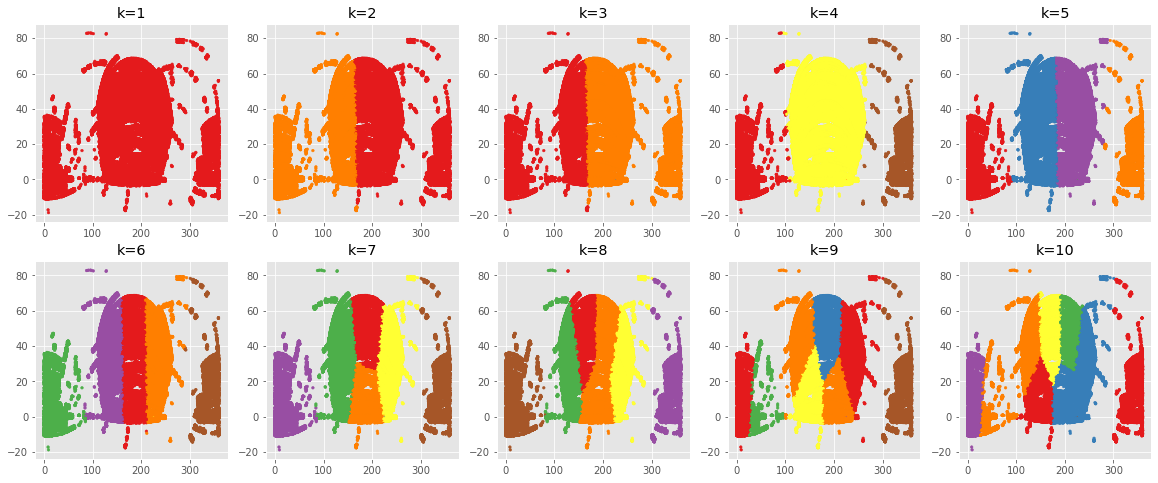

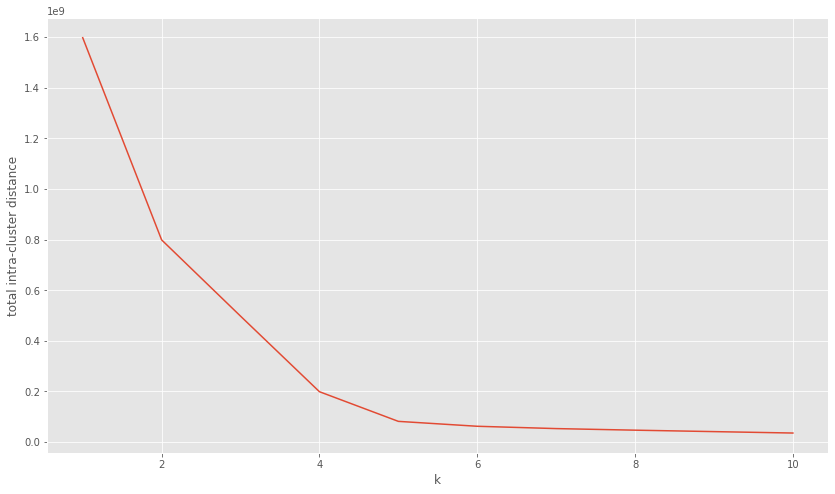

In [447]:
# clustering for k = 1 to k = 10
ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))
# fig, axs = plt.subplots(1,1)

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(df.drop(['type'],axis=1).values)
    scores.append(-model.score(df.drop(['type'],axis=1)))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(x='ra', y='dec', c=y_pred, data=df,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))

    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

# Base-Truth is 3-means (k=3), but something is pulling the centroids to 5

# Below Silhouette plot for k=3 (second down) is definitely off

In [454]:
xx = df.drop('type',axis=1).values

For n_clusters = 2 The silhouette_score is : 0.5052298995272315


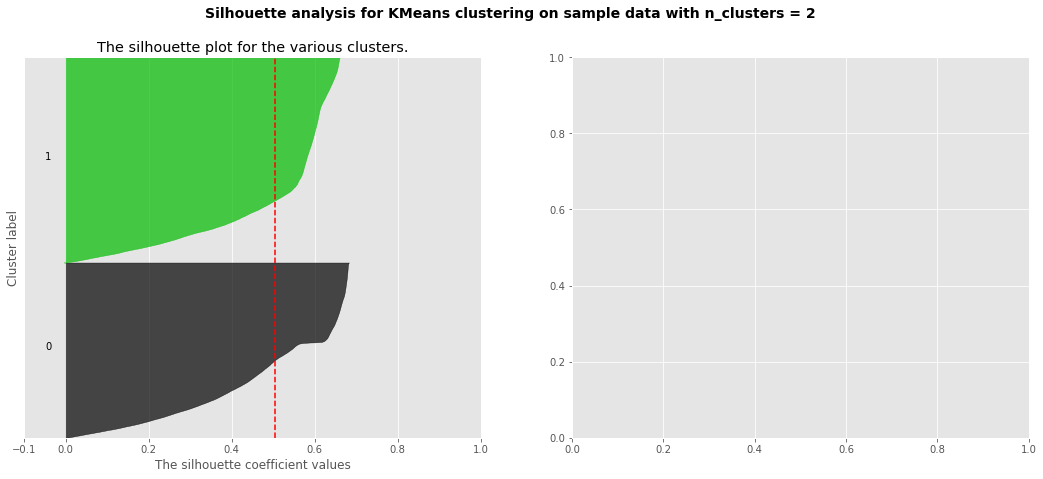

For n_clusters = 3 The silhouette_score is : 0.6233502795569416


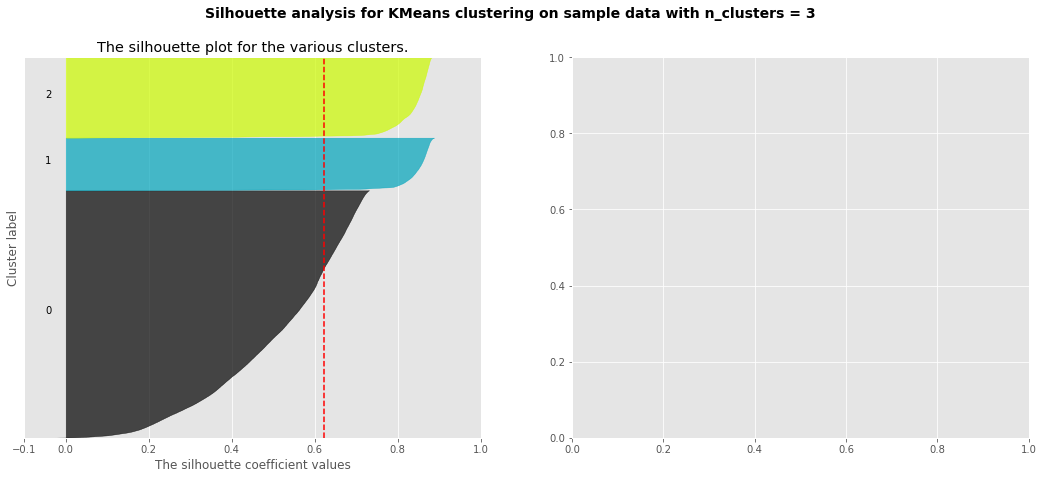

For n_clusters = 4 The silhouette_score is : 0.6134283809774843


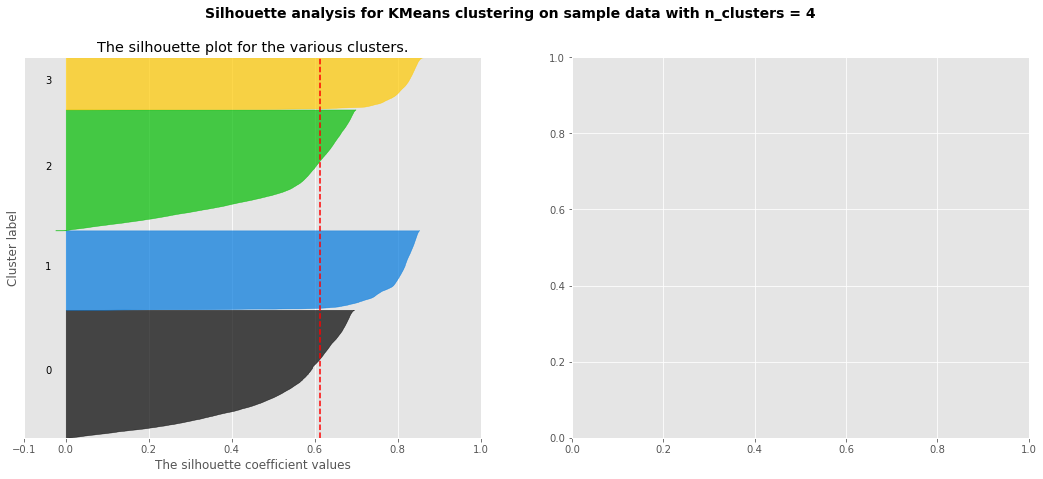

For n_clusters = 5 The silhouette_score is : 0.5355762163074282


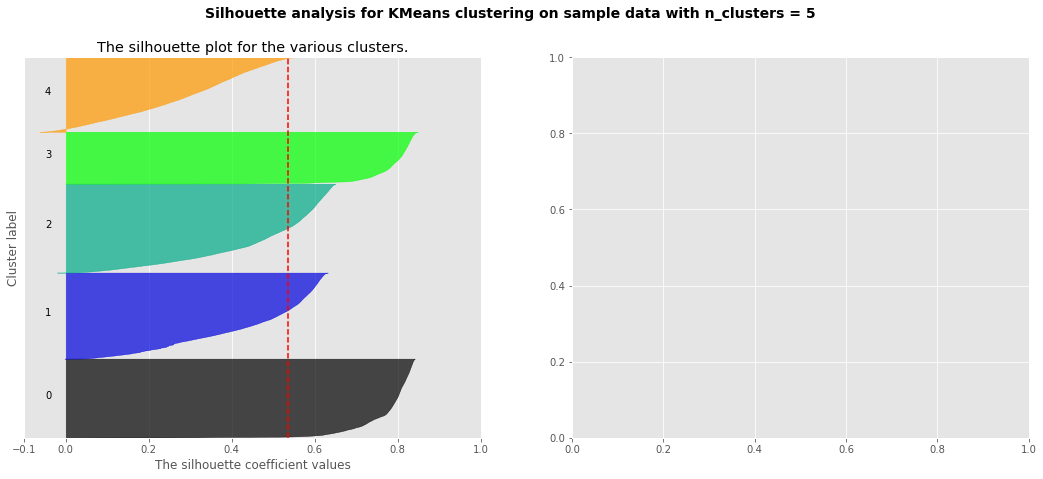

In [453]:
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(xx) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(xx)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(xx, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(xx, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(xx[:, 0], xx[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

    # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# What is pulling the centroids

In [455]:
df.describe()

ra            dec     modelMag_u     modelMag_g  \
count  128410.000000  128410.000000  128410.000000  128410.000000   
mean      172.727188      23.519159      22.012186      20.581639   
std        98.365142      20.031023       2.255321       2.035856   
min         0.005528     -18.785328      10.996230      10.498200   
25%       121.551798       3.087682      20.282810      18.916745   
50%       176.590137      22.651979      22.099510      21.026710   
75%       231.546996      40.050406      23.622457      22.085990   
max       359.999810      83.000519      32.781390      31.602240   

          modelMag_r     modelMag_i     modelMag_z              z  
count  128410.000000  128410.000000  128410.000000  128410.000000  
mean       19.621415      19.077730      18.771310       0.605579  
std         1.855247       1.763285       1.774235       0.772703  
min         9.822070       9.469903       9.612333      -0.010885  
25%        18.122810      17.734127      17.469977       0.056073  
50%        20.079965      19.384490      18.995615       0.425472  
75%        21.026285      20.395287      19.937825       0.733436  
max        31.635240      32.141470      29.383740       7.011245

# A single -9999 in `u`, `g`, and `z`   =>   (drop row)

In [456]:
idx = df[(df == -9999.0).any(axis=1)].index
df.iloc[idx]

Empty DataFrame
Columns: [ra, dec, modelMag_u, modelMag_g, modelMag_r, modelMag_i, modelMag_z, z, type]
Index: []

In [457]:
df = df.drop(idx)
df.describe()

ra            dec     modelMag_u     modelMag_g  \
count  128410.000000  128410.000000  128410.000000  128410.000000   
mean      172.727188      23.519159      22.012186      20.581639   
std        98.365142      20.031023       2.255321       2.035856   
min         0.005528     -18.785328      10.996230      10.498200   
25%       121.551798       3.087682      20.282810      18.916745   
50%       176.590137      22.651979      22.099510      21.026710   
75%       231.546996      40.050406      23.622457      22.085990   
max       359.999810      83.000519      32.781390      31.602240   

          modelMag_r     modelMag_i     modelMag_z              z  
count  128410.000000  128410.000000  128410.000000  128410.000000  
mean       19.621415      19.077730      18.771310       0.605579  
std         1.855247       1.763285       1.774235       0.772703  
min         9.822070       9.469903       9.612333      -0.010885  
25%        18.122810      17.734127      17.469977       0.056073  
50%        20.079965      19.384490      18.995615       0.425472  
75%        21.026285      20.395287      19.937825       0.733436  
max        31.635240      32.141470      29.383740       7.011245

In [460]:
xx = df.drop('type',axis=1).values

## Looks better now that the data is clean

For n_clusters = 2 The silhouette_score is : 0.5052298995272315


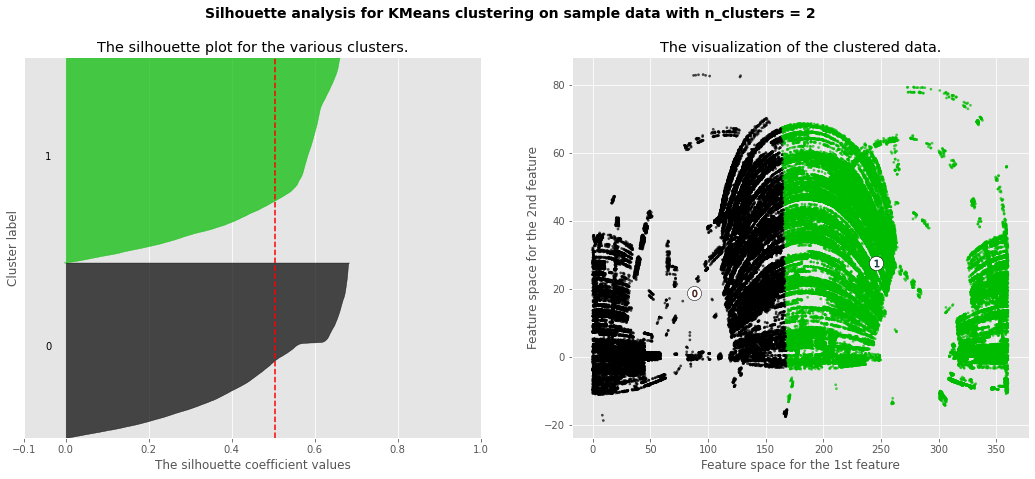

For n_clusters = 3 The silhouette_score is : 0.6233502795569416


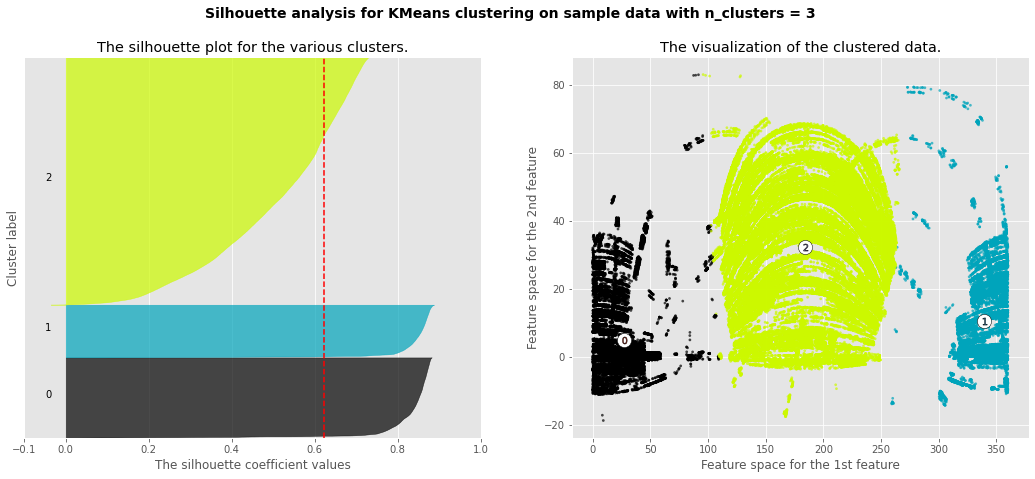

For n_clusters = 4 The silhouette_score is : 0.6134283809774843


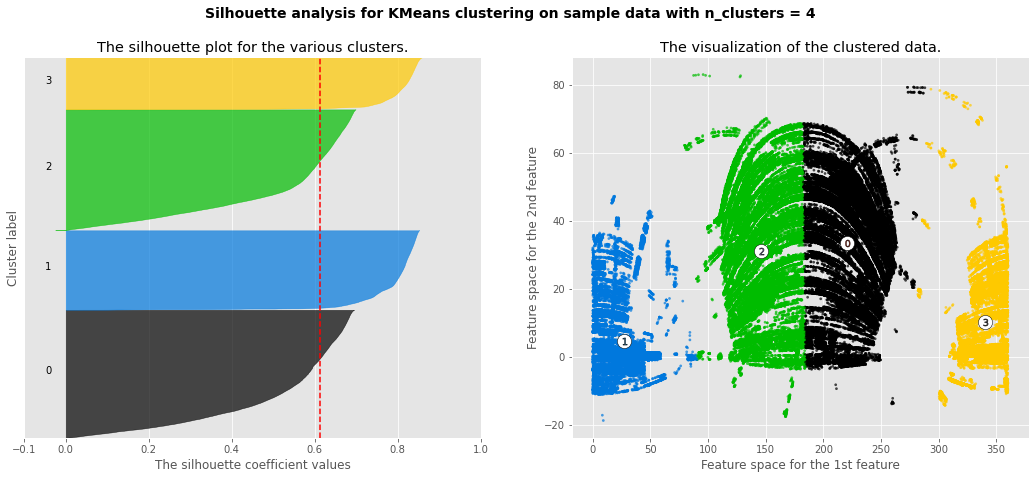

In [461]:
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(xx) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(xx)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(xx, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(xx, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 25  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(xx[:, 0], xx[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# `ra` x `dec` visualization also indicates there are either 2 (square projection of  half-sphere--mostly the N sky) or 3 clusters--with respect to the `ra` & `dec` dimension of the feature space

In [ ]:
plt.scatter(xx[:, 0], xx[:, 1], c=Y_iris_gt, cmap=cmap);

In [228]:
ids = pd.read_csv('../../../comp5360_final/data/final_combined.csv', skiprows=1).dropna()

In [230]:
ids[ids['ra']=='ra']

name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u  \
12902   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
25653   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
38508   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
51077   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
64820   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
77557   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
90123   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
102957  name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
115433  name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   

        modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd  \
12902   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
25653   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
38508   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
51077   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
64820   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
77557   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
90123   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
102957  modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
115433  modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   

        fiberID  z  
12902   fiberID  z  
25653   fiberID  z  
38508   fiberID  z  
51077   fiberID  z  
64820   fiberID  z  
77557   fiberID  z  
90123   fiberID  z  
102957  fiberID  z  
115433  fiberID  z

In [231]:
ids = ids[ids['ra']!='ra']

In [247]:
len(df)

128410

In [248]:
len(ids)

128411

In [274]:
ids.loc[:,'modelMag_g'] = ids.loc[:,'modelMag_g'].astype(float)

C:\Users\Bob\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [277]:
(ids['modelMag_g']).min()

-9999.0

In [266]:
idx == -9999.0

array([], dtype=bool)

In [283]:
ids = ids.drop(ids[ids['modelMag_g']==-9999].index)

In [284]:
ids['type']

0         GALAXY
1         GALAXY
2         GALAXY
3         GALAXY
4         GALAXY
           ...  
128424    GALAXY
128425    GALAXY
128426    GALAXY
128427    GALAXY
128428    GALAXY
Name: type, Length: 128410, dtype: object

In [285]:
df

ra        dec  modelMag_u  modelMag_g  modelMag_r  modelMag_i  \
0       135.689107  32.494632    23.87882    22.27530    20.39501    19.16573   
1       144.826101  31.274185    24.77759    22.83188    22.58444    21.16812   
2       142.188790  35.582444    25.26307    22.66389    20.60976    19.34857   
3       338.741038  -0.402828    22.13682    23.77656    21.61162    20.50454   
4       345.282593  21.183866    19.43718    17.58028    16.49747    15.97711   
...            ...        ...         ...         ...         ...         ...   
128424  190.575691  49.599248    24.64325    21.97179    21.13782    20.39246   
128425  208.030013   5.826776    19.79914    18.14168    17.24405    16.74151   
128426  174.859156   6.173859    19.31070    17.96233    17.22089    16.78536   
128427   34.989308  -0.885331    23.46685    22.58100    20.91271    20.09650   
128428   34.989308  -0.885331    23.46685    22.58100    20.91271    20.09650   

        modelMag_z         z  
0         18.79371  0.634794  
1         21.61427  0.779136  
2         18.94827  0.644195  
3         19.25010  0.932346  
4         15.54461  0.116123  
...            ...       ...  
128424    19.67870  0.754270  
128425    16.37945  0.082538  
128426    16.54875  0.095340  
128427    19.85487  0.346168  
128428    19.85487  0.345884  

[128410 rows x 8 columns]

In [286]:
df['type'] = ids['type']

# NO QUASARs?

In [288]:
df['type'].value_counts()

GALAXY    75126
STAR      53284
Name: type, dtype: int64

In [292]:
import seaborn as sns

# Ground Truth ('GALAXY', 'STAR')

C:\Users\Bob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

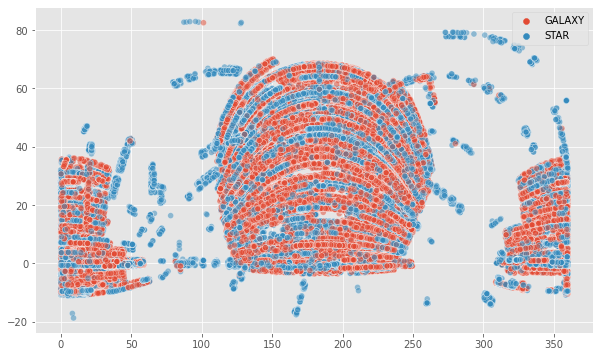

In [299]:
sns.scatterplot(xx[:, 0], xx[:, 1], hue=df['type'].values, alpha=.5)

C:\Users\Bob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

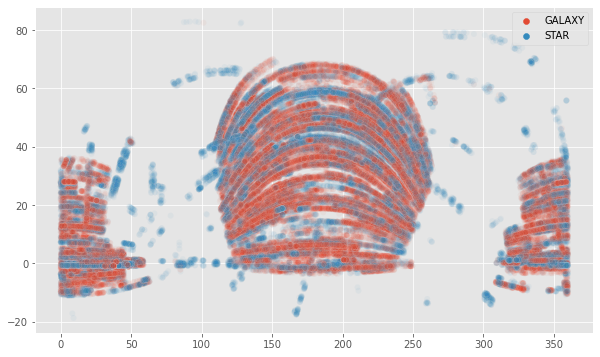

In [298]:
sns.scatterplot(xx[:, 0], xx[:, 1], hue=df['type'].values, alpha=.05)

C:\Users\Bob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

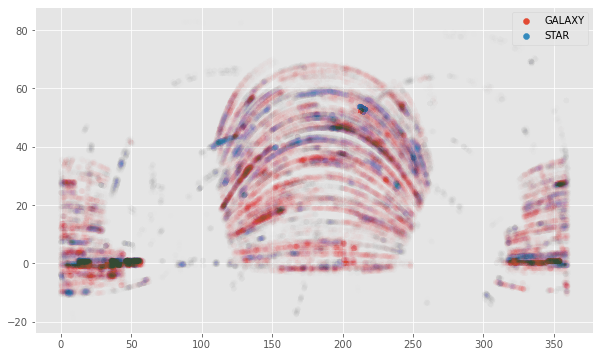

In [297]:
sns.scatterplot(xx[:, 0], xx[:, 1], hue=df['type'].values, alpha=.005)

In [305]:
df.columns

Index(['ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'z', 'type'],
      dtype='object')

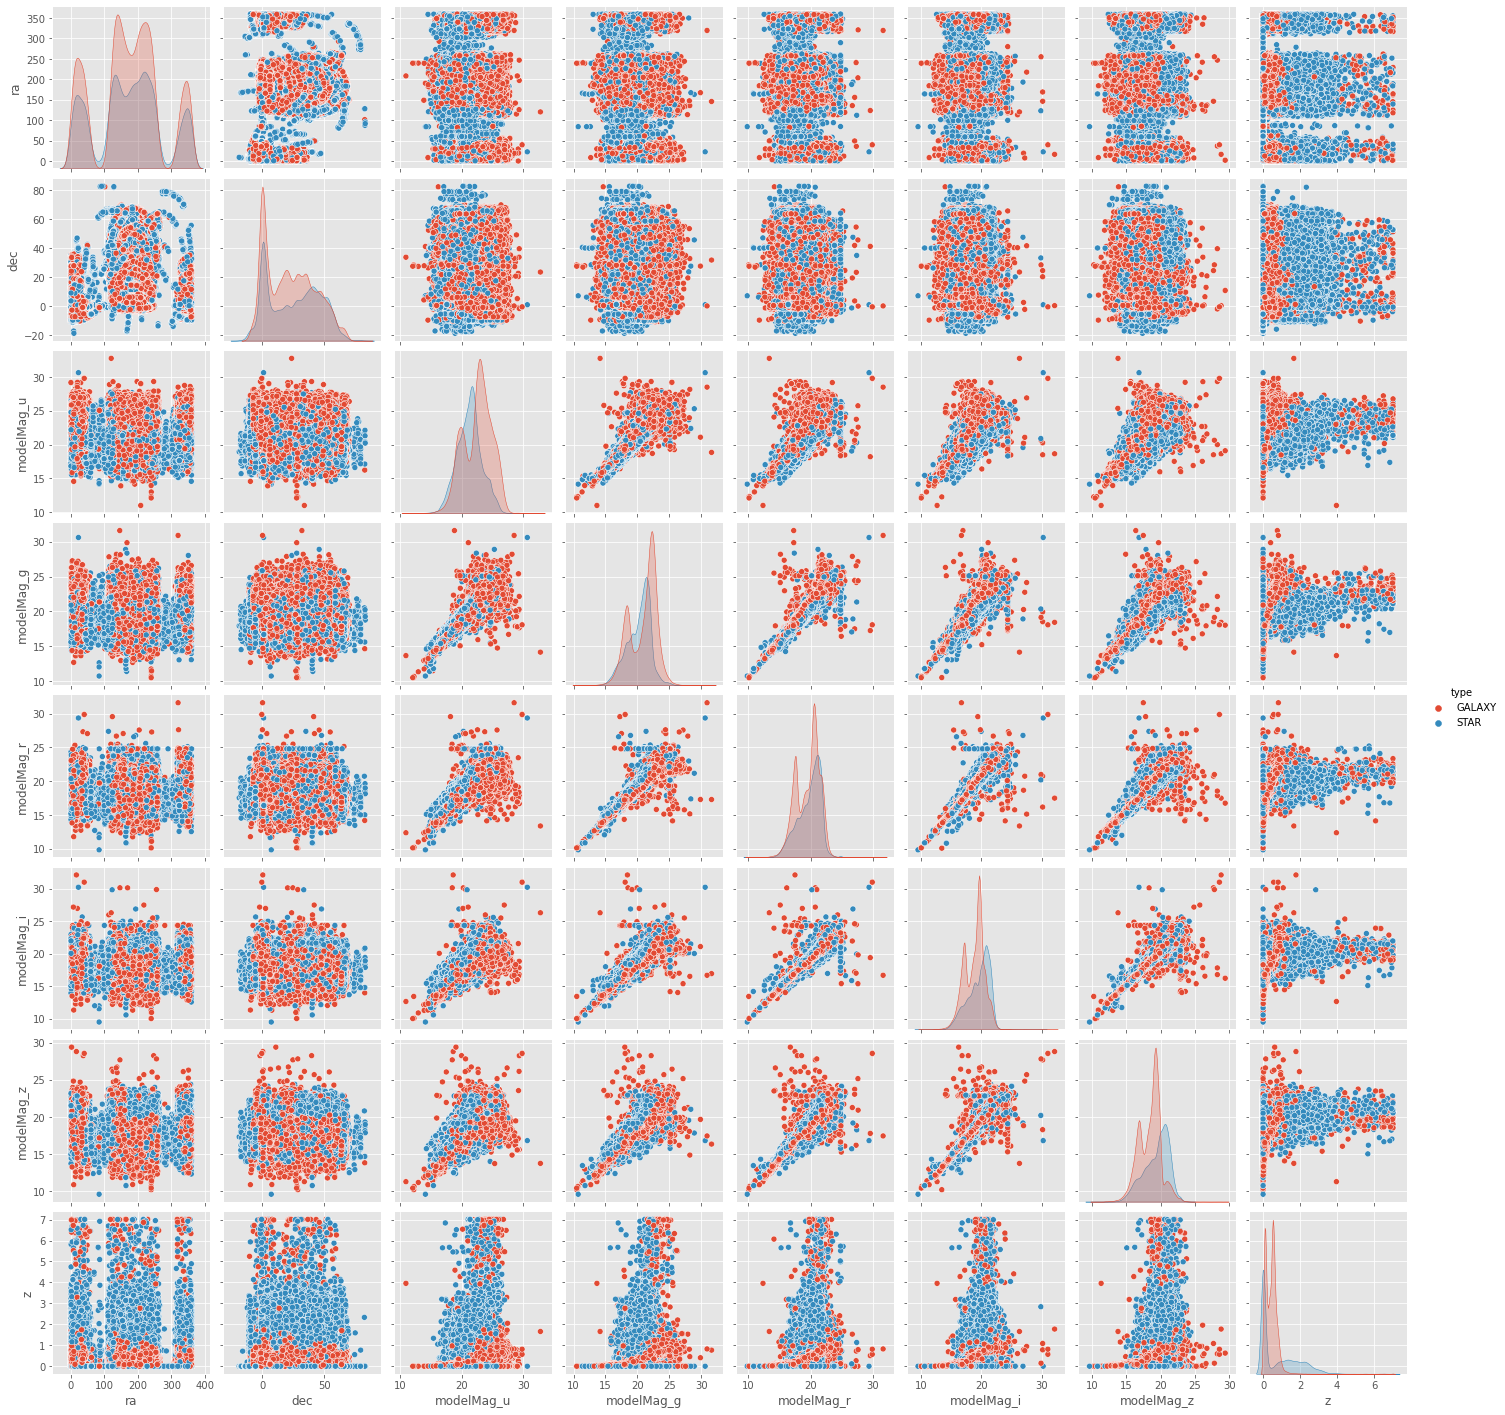

In [309]:
sns.pairplot(df, hue='type')

<AxesSubplot:xlabel='modelMag_i', ylabel='modelMag_r'>

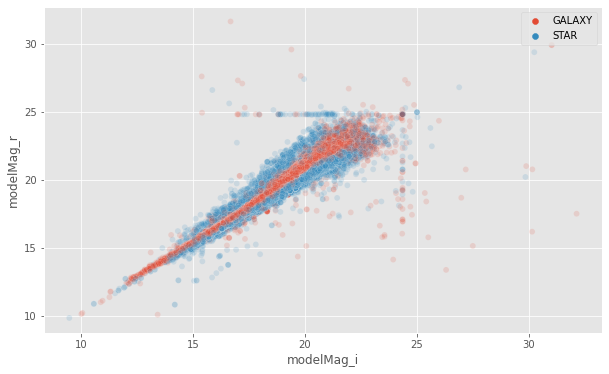

In [314]:
sns.scatterplot(x='modelMag_i', y='modelMag_r', data=df, hue=df['type'].values, alpha=.15)

<AxesSubplot:xlabel='modelMag_i', ylabel='modelMag_r'>

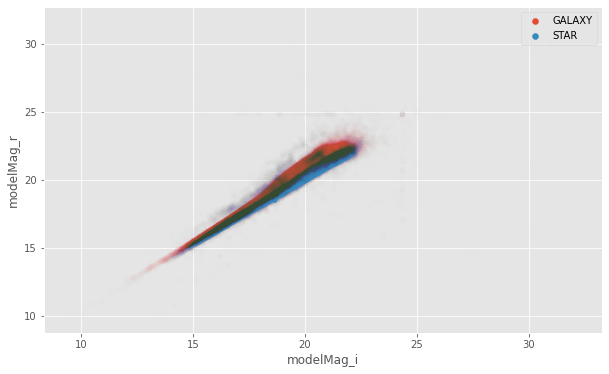

In [330]:
sns.scatterplot(x='modelMag_i', y='modelMag_r', data=df, hue=df['type'].values, alpha=.002)

<AxesSubplot:xlabel='z', ylabel='modelMag_z'>

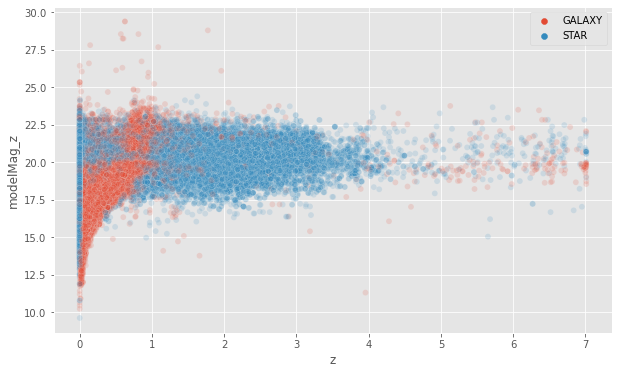

In [315]:
sns.scatterplot(x='z', y='modelMag_z', data=df, hue=df['type'].values, alpha=.15)

<AxesSubplot:xlabel='z', ylabel='modelMag_z'>

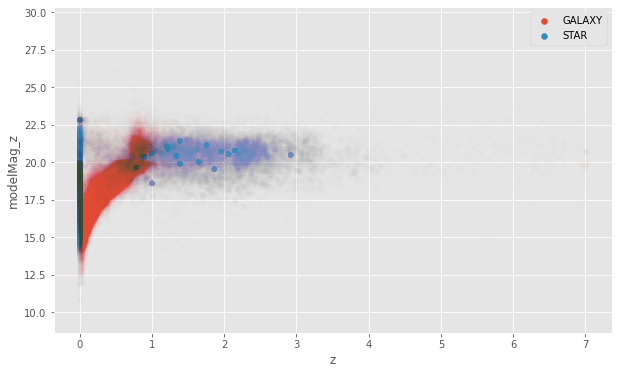

In [322]:
sns.scatterplot(x='z', y='modelMag_z', data=df, hue=df['type'].values, alpha=.0025)

<AxesSubplot:xlabel='modelMag_g', ylabel='modelMag_z'>

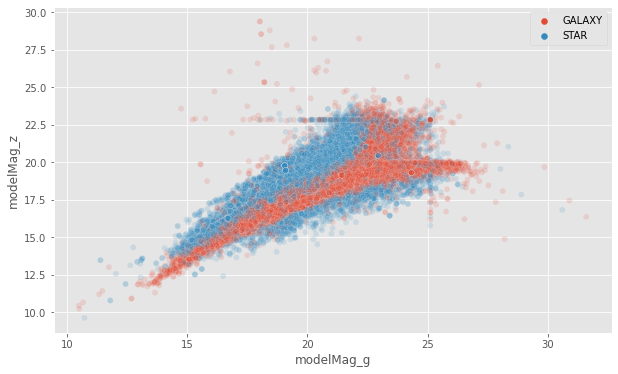

In [313]:
sns.scatterplot(x='modelMag_g', y='modelMag_z', data=df, hue=df['type'].values, alpha=.15)

<AxesSubplot:xlabel='modelMag_g', ylabel='modelMag_z'>

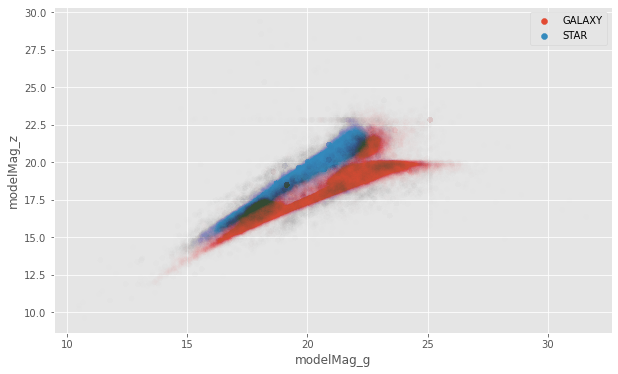

In [325]:
sns.scatterplot(x='modelMag_g', y='modelMag_z', data=df, hue=df['type'].values, alpha=.0025)